In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("heart.csv")

#Preprocessing

##clean the data

In [3]:
df.shape

(310, 14)

In [4]:
df.rename(columns={"cp" : "Chest pain type", "trestbps" : "Resting blood pressure",
                   "chol" : "Serum cholesterol", "fbs" : "Fasting blood sugar", "restecg" :  "Resting electrocardiographic results",
                   "thalach" : "Maximum heart rate achieved", "exang" : "Exercise-induced angina",
                   "oldpeak" : "ST depression induced by exercise", "slope" : "Slope of the peak exercise ST segment",
                   "ca" : "Number of major vessels colored by fluoroscopy", "thal" : "Thalassemia"}, inplace=True)

In [5]:
df.head()

,age,sex,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic results,Maximum heart rate achieved,Exercise-induced angina,ST depression induced by exercise,Slope of the peak exercise ST segment,Number of major vessels colored by fluoroscopy,Thalassemia,target
0,63.0,1.0,3.0,145.0,233,1.0,0.0,150.0,0,2.3,0,0.0,1.0,1
1,37.0,1.0,2.0,130.0,250,0.0,1.0,187.0,0,3.5,0,0.0,2.0,1
2,41.0,0.0,1.0,130.0,204,0.0,0.0,172.0,0,1.4,2,0.0,2.0,1
3,56.0,1.0,1.0,120.0,236,0.0,1.0,178.0,0,0.8,2,0.0,2.0,1
4,NaN,0.0,0.0,120.0,354,0.0,1.0,163.0,1,0.6,2,0.0,2.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             307 non-null    float64
 1   sex                                             309 non-null    float64
 2   Chest pain type                                 309 non-null    float64
 3   Resting blood pressure                          308 non-null    float64
 4   Serum cholesterol                               305 non-null    object 
 5   Fasting blood sugar                             307 non-null    float64
 6   Resting electrocardiographic results            309 non-null    float64
 7   Maximum heart rate achieved                     307 non-null    float64
 8   Exercise-induced angina                         310 non-null    int64  
 9   ST depression induced by exercise          

In [7]:
df['Serum cholesterol'] = pd.to_numeric(df['Serum cholesterol'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             307 non-null    float64
 1   sex                                             309 non-null    float64
 2   Chest pain type                                 309 non-null    float64
 3   Resting blood pressure                          308 non-null    float64
 4   Serum cholesterol                               303 non-null    float64
 5   Fasting blood sugar                             307 non-null    float64
 6   Resting electrocardiographic results            309 non-null    float64
 7   Maximum heart rate achieved                     307 non-null    float64
 8   Exercise-induced angina                         310 non-null    int64  
 9   ST depression induced by exercise          

In [9]:
df.isna().sum()

,0
age,3
sex,1
Chest pain type,1
Resting blood pressure,2
Serum cholesterol,7
Fasting blood sugar,3
Resting electrocardiographic results,1
Maximum heart rate achieved,3
Exercise-induced angina,0
ST depression induced by exercise,1


In [10]:
fill_with_meadian = ['age', 'Resting blood pressure', 'Serum cholesterol', 'Maximum heart rate achieved', 'ST depression induced by exercise']
fill_with_mode = ['Chest pain type', 'Thalassemia', 'Fasting blood sugar', 'Resting electrocardiographic results', 'sex', 'Number of major vessels colored by fluoroscopy']

In [11]:
columns_with_nan = df.columns[df.isnull().any()].tolist()
for column in columns_with_nan:
    if column in fill_with_meadian:
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)
        print(f"Filled '{column}' with its median value: {median_value:.2f}")
    elif column in fill_with_mode:
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)
        print(f"Filled '{column}' with its mode value: {mode_value:.2f}")
    else:
        print(f"No specific imputation rule for '{column}'. Dropping rows with this missing value.")


Filled 'age' with its median value: 55.00
Filled 'sex' with its mode value: 1.00
Filled 'Chest pain type' with its mode value: 0.00
Filled 'Resting blood pressure' with its median value: 130.00
Filled 'Serum cholesterol' with its median value: 240.00
Filled 'Fasting blood sugar' with its mode value: 0.00
Filled 'Resting electrocardiographic results' with its mode value: 1.00
Filled 'Maximum heart rate achieved' with its median value: 153.00
Filled 'ST depression induced by exercise' with its median value: 0.80
Filled 'Number of major vessels colored by fluoroscopy' with its mode value: 0.00
Filled 'Thalassemia' with its mode value: 2.00


In [12]:
df.isna().sum()

,0
age,0
sex,0
Chest pain type,0
Resting blood pressure,0
Serum cholesterol,0
Fasting blood sugar,0
Resting electrocardiographic results,0
Maximum heart rate achieved,0
Exercise-induced angina,0
ST depression induced by exercise,0


In [13]:
df.duplicated().sum()

np.int64(8)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.shape

(302, 14)

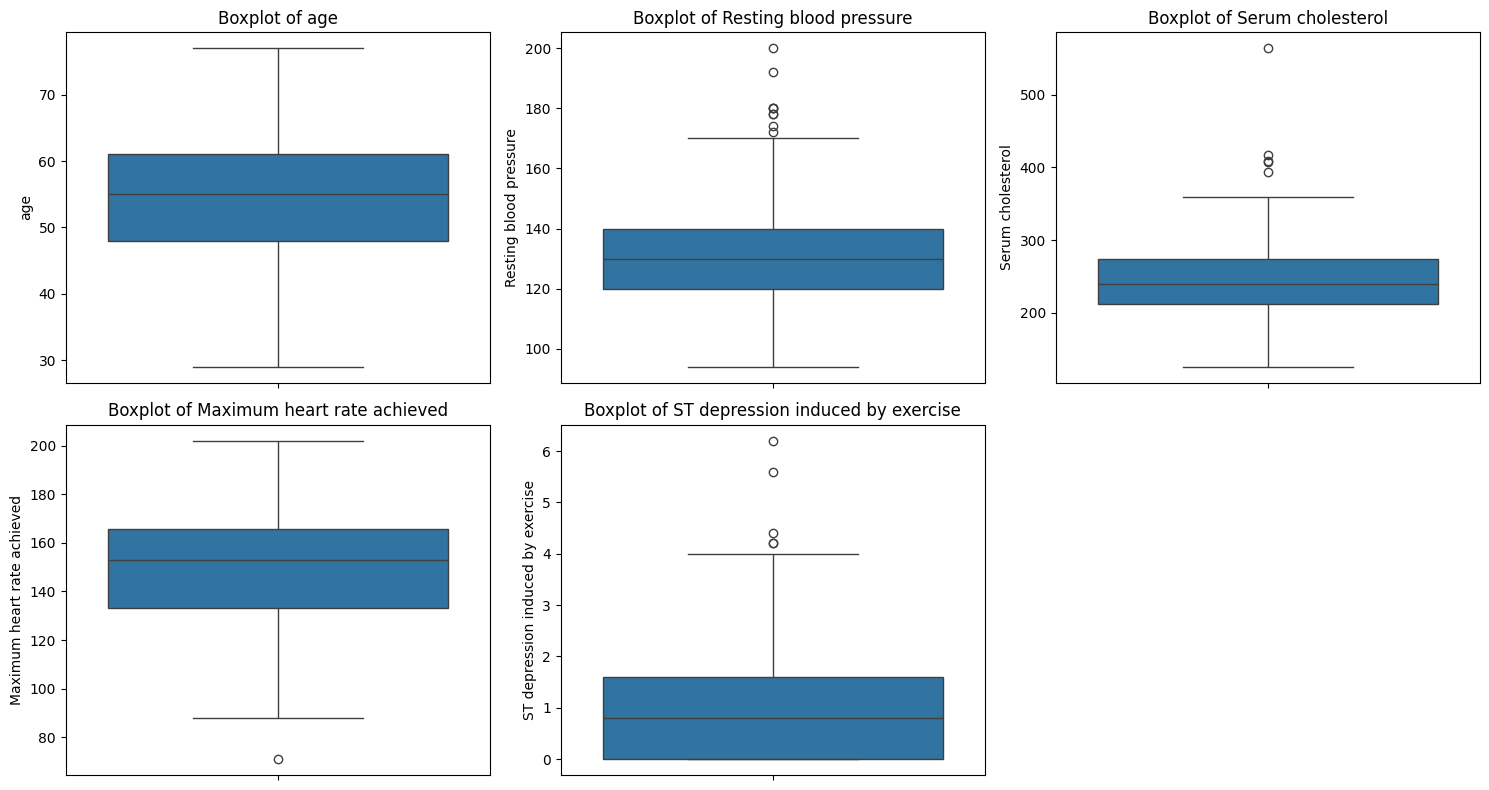

In [17]:
#Outlier before removing
numeric_cols = ["age", "Resting blood pressure", "Serum cholesterol", "Maximum heart rate achieved", "ST depression induced by exercise"]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [18]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound))
print("Outlier counts by column (IQR method):")
print(outlier_mask.sum())

Outlier counts by column (IQR method):
age                                  0
Resting blood pressure               9
Serum cholesterol                    5
Maximum heart rate achieved          1
ST depression induced by exercise    5
dtype: int64


In [19]:
for col in numeric_cols:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col],
                       np.where(df[col] > upper_bound[col], upper_bound[col], df[col]))

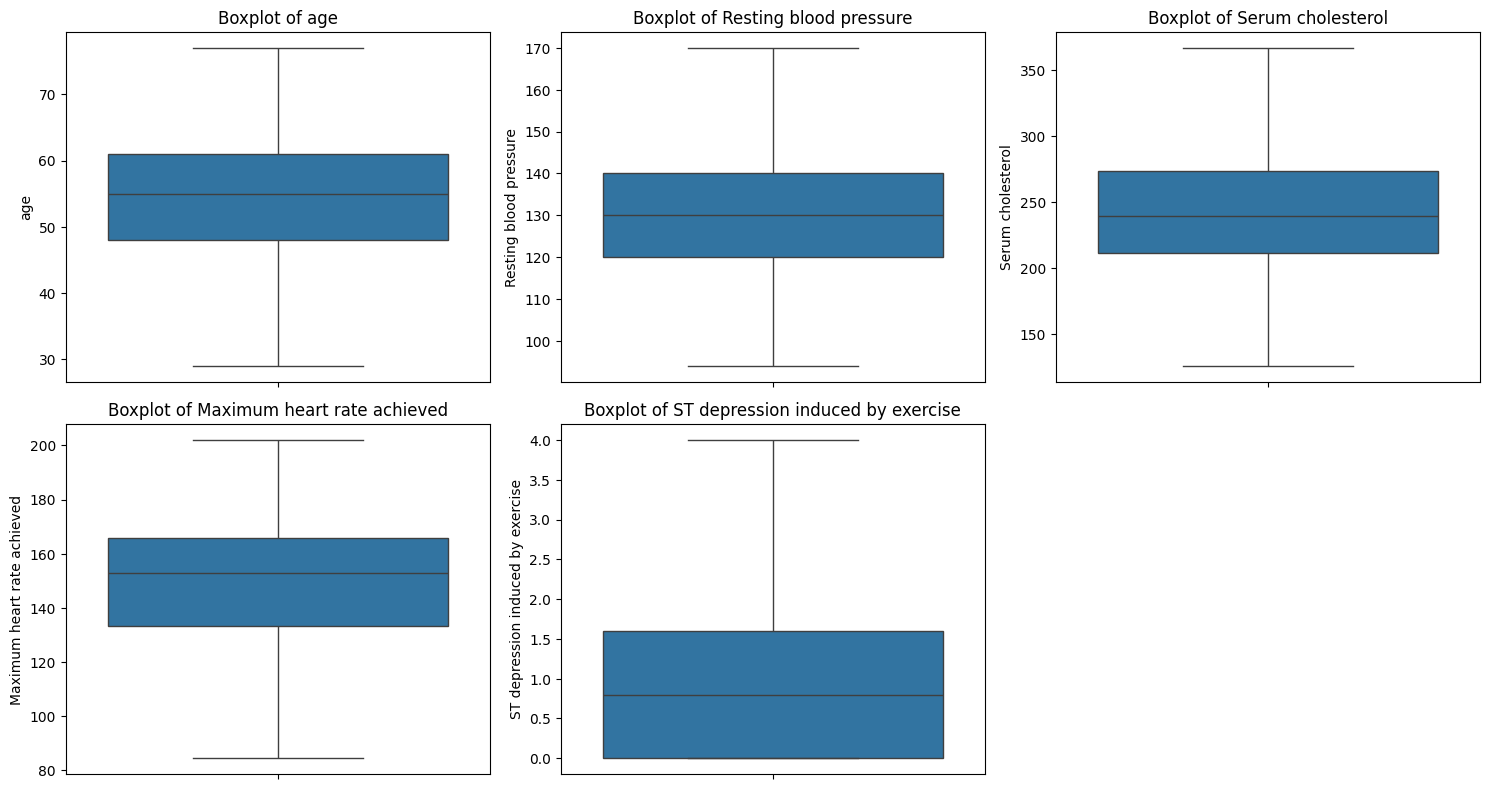

In [20]:
#Outlier after removing
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

##Feature Selection

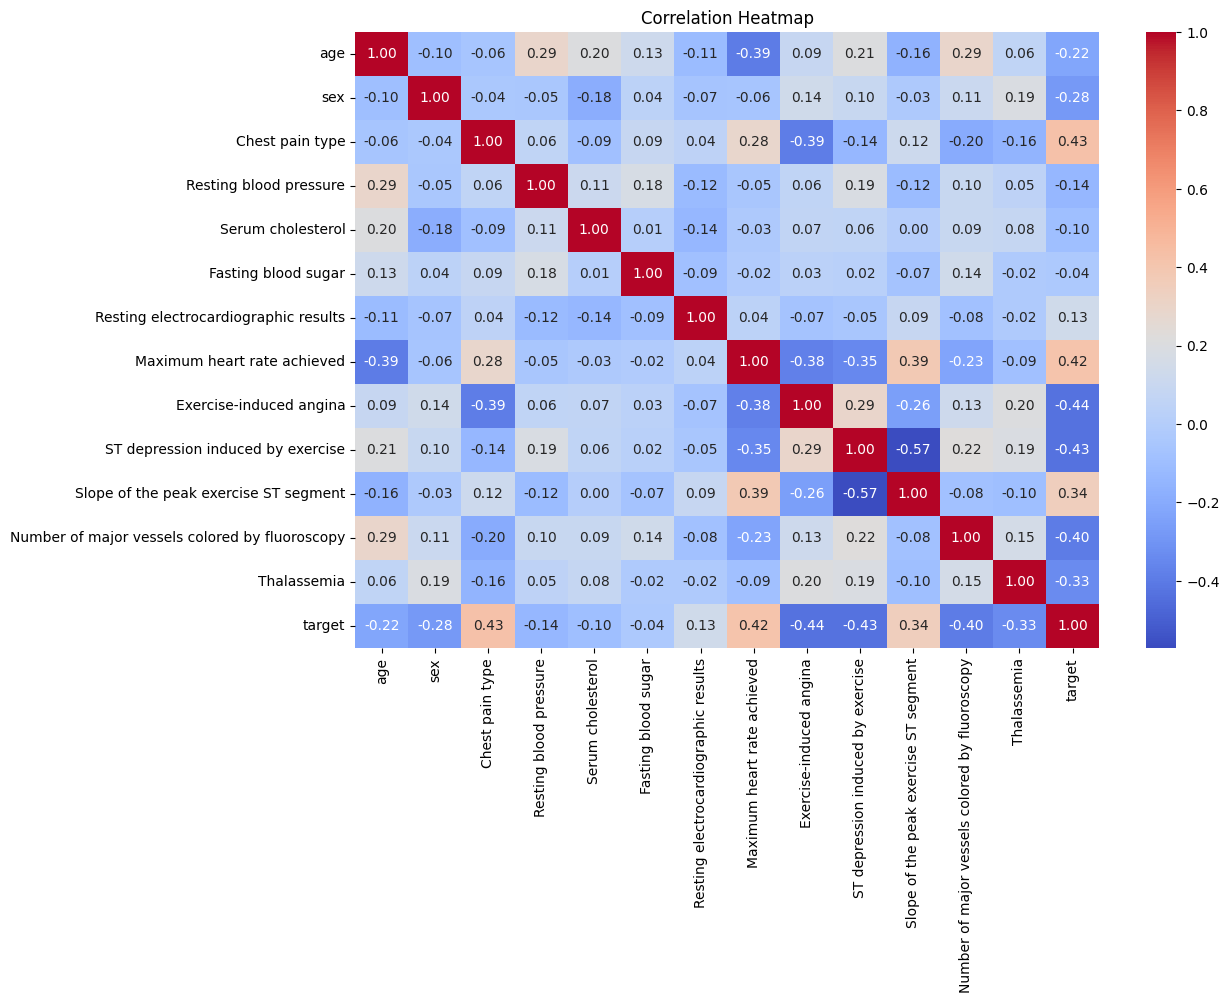

In [21]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [22]:
target_corr = corr["target"].sort_values(ascending=False)
print("Correlation of features with target:\n")
print(target_corr)

Correlation of features with target:

target                                            1.000000
Chest pain type                                   0.428515
Maximum heart rate achieved                       0.416328
Slope of the peak exercise ST segment             0.343940
Resting electrocardiographic results              0.134874
Fasting blood sugar                              -0.035686
Serum cholesterol                                -0.098352
Resting blood pressure                           -0.138839
age                                              -0.223243
sex                                              -0.277867
Thalassemia                                      -0.332416
Number of major vessels colored by fluoroscopy   -0.397440
ST depression induced by exercise                -0.430389
Exercise-induced angina                          -0.435601
Name: target, dtype: float64


In [23]:
selected_features = target_corr[abs(target_corr) > 0.3].index.tolist()
selected_features.remove("target")

In [24]:
print("Selected features based on correlation:\n", selected_features)

Selected features based on correlation:
 ['Chest pain type', 'Maximum heart rate achieved', 'Slope of the peak exercise ST segment', 'Thalassemia', 'Number of major vessels colored by fluoroscopy', 'ST depression induced by exercise', 'Exercise-induced angina']


In [27]:
df_selected = df[selected_features + ["target"]]
df_selected

,Chest pain type,Maximum heart rate achieved,Slope of the peak exercise ST segment,Thalassemia,Number of major vessels colored by fluoroscopy,ST depression induced by exercise,Exercise-induced angina,target
0,3.0,150.0,0,1.0,0.0,2.3,0,1
1,2.0,187.0,0,2.0,0.0,3.5,0,1
2,1.0,172.0,2,2.0,0.0,1.4,0,1
3,1.0,178.0,2,2.0,0.0,0.8,0,1
4,0.0,163.0,2,2.0,0.0,0.6,1,1
...,...,...,...,...,...,...,...,...
298,0.0,123.0,1,3.0,0.0,0.2,1,0
299,3.0,132.0,1,3.0,0.0,1.2,0,0
300,0.0,141.0,1,3.0,2.0,3.4,0,0
301,0.0,115.0,1,3.0,1.0,1.2,1,0


#Data Visualization

/tmp/ipython-input-2392445880.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_map, palette="Set2")


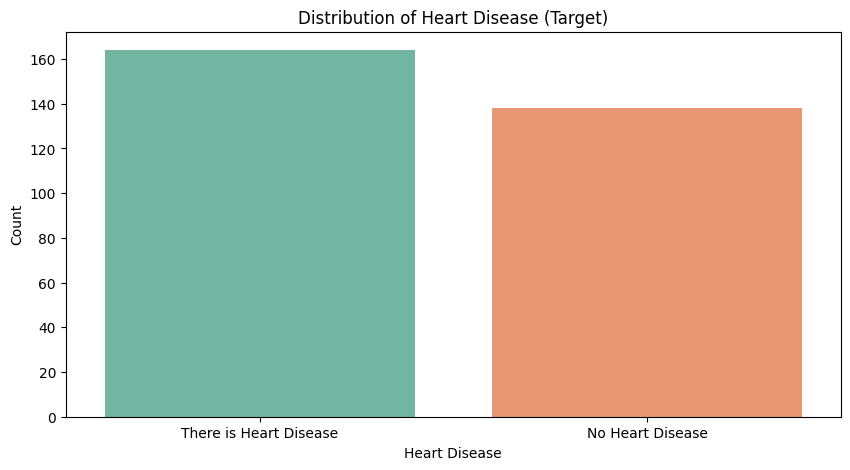

In [64]:
# Countplot of target variable
target_map = df["target"].map({0: "No Heart Disease", 1: "There is Heart Disease"})
plt.figure(figsize=(10,5))
sns.countplot(data=df, x=target_map, palette="Set2")
plt.title("Distribution of Heart Disease (Target)")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

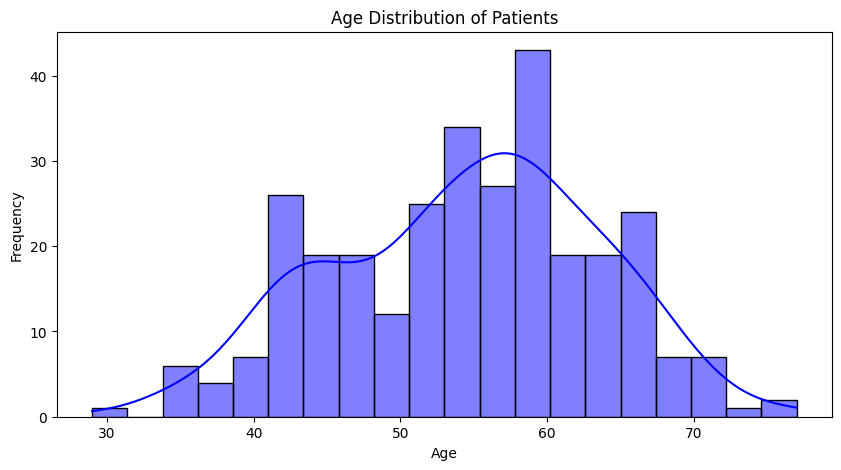

In [62]:
# 2. Age distribution
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="age", bins=20, kde=True, color="blue")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

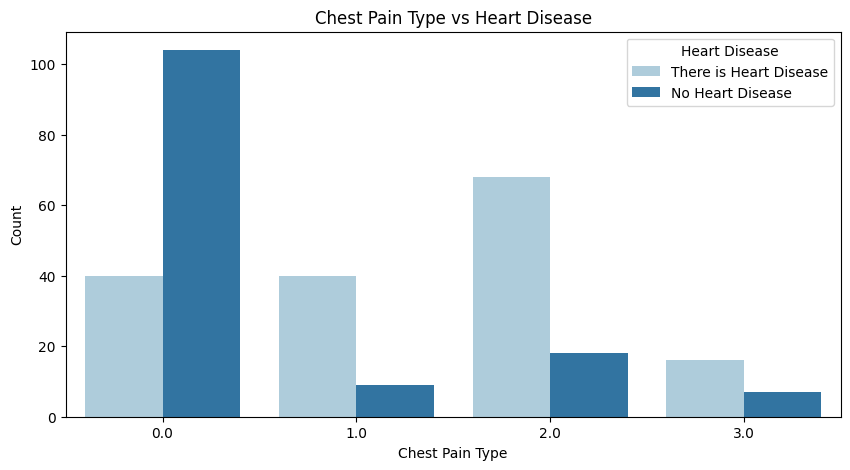

In [65]:
# 3. Chest Pain Type vs Heart Disease
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Chest pain type", hue=target_map, palette="Paired")
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()

/tmp/ipython-input-390729958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_map, y="Maximum heart rate achieved", palette="coolwarm")


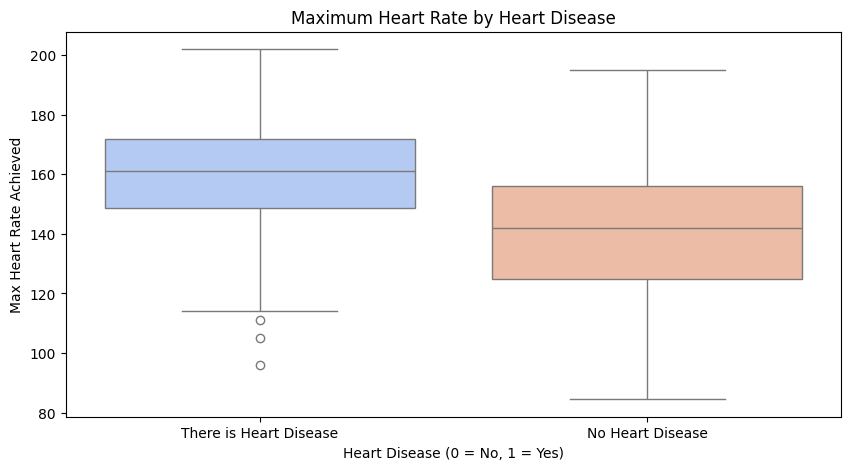

In [66]:
# 4. Maximum Heart Rate by Heart Disease
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x=target_map, y="Maximum heart rate achieved", palette="coolwarm")
plt.title("Maximum Heart Rate by Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Max Heart Rate Achieved")
plt.show()

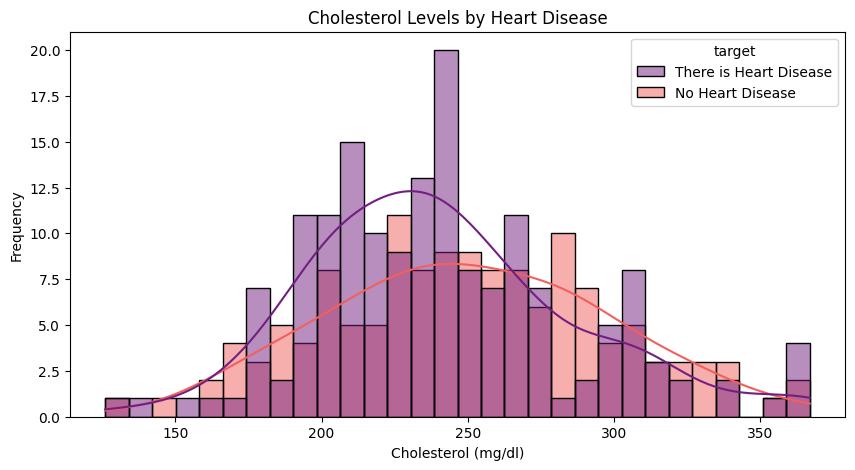

In [68]:
# 5. Cholesterol distribution by Heart Disease
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Serum cholesterol", hue=target_map, bins=30, kde=True, palette="magma")
plt.title("Cholesterol Levels by Heart Disease")
plt.xlabel("Cholesterol (mg/dl)")
plt.ylabel("Frequency")
plt.show()

#Model Training

In [34]:
X = df[selected_features]
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

##Feature Scaling


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (241, 7)
Test set shape: (61, 7)
